In [ ]:
#| default_exp per_sam_one_shot

In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
#| export
from pathlib import Path
from fastcore.all import *
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import resize, to_pil_image
from typing import Tuple
import torch.nn.functional as F

In [22]:
def show_(im_path:str):
    fig, ax = plt.subplots()
    if isinstance(im_path,str) or isinstance(im_path, Path):
        im = Image.open(im_path)
    else: 
        im = im_path
    ax.imshow(im)
    ax.axis('off')

In [14]:
#| export

from transformers import AutoProcessor, SamModel
# from transformers import PerSamModel

processor = AutoProcessor.from_pretrained("facebook/sam-vit-huge")
# model = PerSamModel.from_pretrained("facebook/sam-vit-huge")
model = SamModel.from_pretrained("facebook/sam-vit-huge")
     

In [3]:
model

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0): SamVisionLayer(
        (layer_norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (layer_norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELUActivation()
        )
      )
      (1): SamVisionLayer(
        (layer_norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (q

In [5]:
from yolo_v8_segmentation.viz_utils import *

In [6]:
im_path=Path(r'N:/homes/Jan/Good/Orginal1.png')
msk_path=Path(r'N:/homes/Jan/Good/Maske1.png')

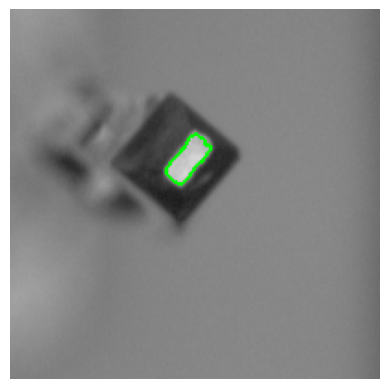

In [7]:
overlay_mask_border_on_image(im_path, msk_path)

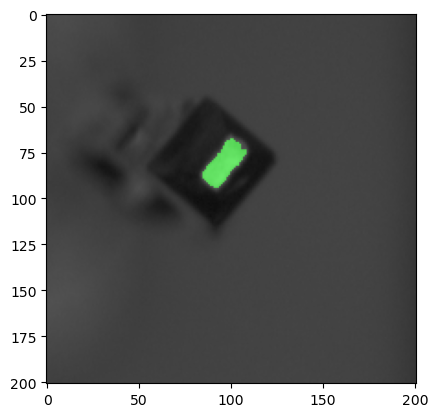

In [9]:
overlay_mask(
    im_path=im_path,
    msk_path=msk_path
)

# Reading Reference image and mask

Path('N:/homes/Jan/Good/Orginal1.png')

 im is = <PIL.PngImagePlugin.PngImageFile image mode=RGB size=201x201 at 0x1C0D64449A0>


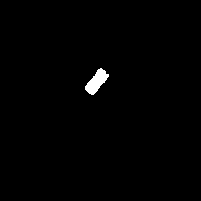

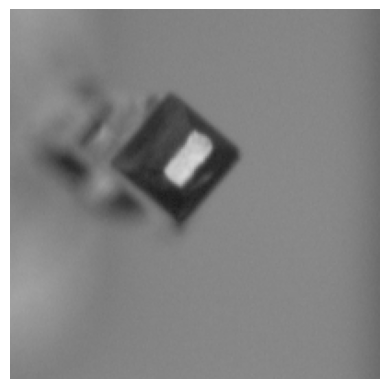

In [21]:
ref_img = Image.open(im_path).convert('RGB')
show_(im_path)
ref_mask = cv2.cvtColor(cv2.imread(f'{msk_path}'), cv2.COLOR_BGR2RGB)
np.unique(ref_mask)
viz_mask = ref_mask.astype(np.uint8)
Image.fromarray(viz_mask)

# Getting target test image

In [26]:
tst_im_path = Path(r'N:\homes\hasan\easy_front\Eberhard cropping script\InfineonEasyCropPins\Cropped_Images_png')
tst_im_path.ls()

(#1640) [Path('N:/homes/hasan/easy_front/Eberhard cropping script/InfineonEasyCropPins/Cropped_Images_png/0_0_CroppedImg_20231018_92042317_1_A.png'),Path('N:/homes/hasan/easy_front/Eberhard cropping script/InfineonEasyCropPins/Cropped_Images_png/0_0_CroppedImg_20231018_92042317_2_A.png'),Path('N:/homes/hasan/easy_front/Eberhard cropping script/InfineonEasyCropPins/Cropped_Images_png/0_0_CroppedImg_20231018_92042317_3_A.png'),Path('N:/homes/hasan/easy_front/Eberhard cropping script/InfineonEasyCropPins/Cropped_Images_png/0_0_CroppedImg_20231018_92042317_4_A.png'),Path('N:/homes/hasan/easy_front/Eberhard cropping script/InfineonEasyCropPins/Cropped_Images_png/0_0_CroppedImg_20231018_92042317_5_A.png'),Path('N:/homes/hasan/easy_front/Eberhard cropping script/InfineonEasyCropPins/Cropped_Images_png/0_0_CroppedImg_20231018_92042317_6_A.png'),Path('N:/homes/hasan/easy_front/Eberhard cropping script/InfineonEasyCropPins/Cropped_Images_png/0_0_CroppedImg_20231018_92042317_7_A.png'),Path('N:/ho

In [27]:
idx = np.random.choice(len(tst_im_path.ls()))

In [28]:
img = Image.open(f'{tst_im_path.ls()[idx]}').convert('RGB')
pixel_values = processor(images=ref_img, return_tensors='pt').pixel_values
pixel_values.shape

torch.Size([1, 3, 1024, 1024])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


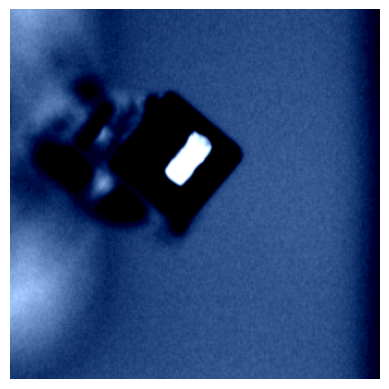

In [29]:
show_(np.transpose(pixel_values[0,:,:,:], (1, 2, 0)))

In [30]:
device = 'cpu'

In [31]:
model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0): SamVisionLayer(
        (layer_norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (layer_norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELUActivation()
        )
      )
      (1): SamVisionLayer(
        (layer_norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (q

In [32]:
with torch.no_grad():
    ref_feat = model.get_image_embeddings(pixel_values.to(device))
    ref_feat = ref_feat.squeeze().permute(1, 2, 0)
    


In [33]:
ref_mask.shape

(201, 201, 3)

In [34]:
target_length=1024
old_h, old_w = ref_mask.shape[:2]

# Get mask size

In [35]:
scale = target_length * 1.0 / max(old_h, old_w)
print(f'current scale is {scale}')
new_h, new_w = old_h * scale, old_w * scale
print(f' new height and width are {new_h} and {new_w}')
newh, neww = int(new_h + 0.5), int(new_w + 0.5)
print(f' rounded height and widht are {newh} and {neww}')
target_size = newh, neww

current scale is 5.0945273631840795
 new height and width are 1024.0 and 1024.0
 rounded height and widht are 1024 and 1024


In [36]:
mask_ = np.array(resize(to_pil_image(ref_mask), target_size))
mask_.shape

(1024, 1024, 3)

In [114]:
#| export
def get_preprocess_shape(
    oldh:int,
    oldw:int,
    long_side_length:int
    ):
    ' Scaling output size based on long_side_lenght'

    scale = long_side_length * 1 / max(oldh, oldw)
    newh, neww = int((scale * oldh) + 0.5), int((scale* oldw) + 0.5)
    return (newh, neww)

In [61]:
get_preprocess_shape(old_h, old_w, long_side_length=1024)

(1024, 1024)

# Process masks 

In [103]:
input_mask = torch.as_tensor(mask_)
input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]
input_mask.shape


torch.Size([1, 3, 1024, 1024])

### Normalize masks

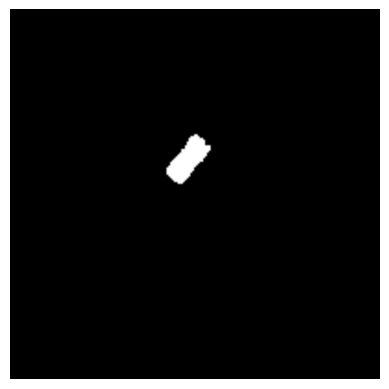

In [41]:
show_(mask_)

In [42]:
pixel_mean = [123.67, 116.28, 103.53]
pixel_std = [58.395, 57.12, 57.375]
img_size = 1024

In [43]:
pixel_mean_ = torch.Tensor(pixel_mean).view(-1,1, 1)
pixel_std_ = torch.Tensor(pixel_std).view(-1,1, 1)
pixel_mean_, pixel_std_, pixel_mean_.shape, pixel_std_.shape

(tensor([[[123.6700]],
 
         [[116.2800]],
 
         [[103.5300]]]),
 tensor([[[58.3950]],
 
         [[57.1200]],
 
         [[57.3750]]]),
 torch.Size([3, 1, 1]),
 torch.Size([3, 1, 1]))

In [104]:
input_mask.shape

torch.Size([1, 3, 1024, 1024])

In [105]:
input_mask_ = (input_mask - pixel_mean_) /pixel_std_

In [106]:
input_mask_.shape

torch.Size([1, 3, 1024, 1024])

### in case of mask size is not intended size

In [47]:
input_mask_.shape[-2:]

torch.Size([1024, 1024])

In [50]:
h, w = input_mask_.shape[-2:]
padh = img_size - h
padw = img_size - w

In [52]:
padh, padw

(0, 0)

In [53]:
input_mask_ = F.pad(input_mask_, (0, padw, 0 , padh))

In [62]:
0.485 * 255

123.675

In [54]:
input_mask_.shape

torch.Size([1, 3, 1024, 1024])

In [96]:
#| export
def normalize_and_padding(
    x:torch.Tensor, #expected shape (b, c, h, w)
    pixel_mean=[123.675, 116.28, 103.55], # imagenet data mean * 255
    pixel_std=[58.395, 57.12, 57.375], # imagenet std * 255
    im_size:int=1024, # desired image size
    )->torch.Tensor:
    'Normalize with imagenet data and pad if necessary'

    pixel_mean_ = torch.Tensor(pixel_mean).view(-1,1,1)
    pixel_std_ = torch.Tensor(pixel_std).view(-1,1,1)

    x = (x - pixel_mean_) / pixel_std_

    h, w = x.shape[-2:]
    padh = im_size - h
    padw = im_size - w
    # TODO
    # need to check height and width right or not
    return F.pad(x, (0, padh, 0 , padw))





In [99]:
ref_mask.shape

(201, 201, 3)

In [100]:
input_mask_t = torch.as_tensor(np.array(resize(to_pil_image(ref_mask), target_size)))
input_mask_t_ = input_mask_t.permute(2,0,1).contiguous()[None,:,:,:]
input_mask_t_.shape


torch.Size([1, 3, 1024, 1024])

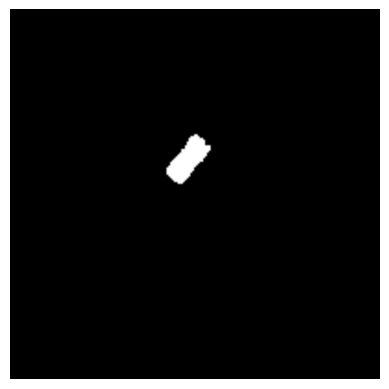

In [101]:
show_(input_mask_t_[0,:,:,:].permute(1,2,0))

In [102]:
input_mask_t_.shape

torch.Size([1, 3, 1024, 1024])

In [111]:
normalized_mask = normalize_and_padding(x=input_mask_t_)
normalized_mask.shape

torch.Size([1, 3, 1024, 1024])

In [115]:
target_size

(1024, 1024)

In [117]:
get_preprocess_shape?

Signature: get_preprocess_shape(oldh: int, oldw: int, long_side_length: int)
Docstring: Scaling output size based on long_side_lenght
File:      c:\users\goni\appdata\local\temp\ipykernel_12768\607432136.py
Type:      function

In [124]:
def resize_(x:np.ndarray, size:Tuple[ int, int ]):
    'resize x to desired size'
    return np.array(resize(to_pil_image(x), size))

In [127]:
def prepare_mask(
    ref_mask:np.ndarray,
    target_length:int=1024
    ):
    'prepare mask for model'
    oldh, oldw = ref_mask.shape[0:2]
    h, w = get_preprocess_shape(oldh, oldw, long_side_length=target_length)
    msk = resize_(ref_mask, (h, w))

    msk = torch.as_tensor(msk)
    msk = msk.permute(2,0, 1).contiguous()[None, :, :, :]
    return normalize_and_padding(msk)







In [129]:
prep_mask = prepare_mask(ref_mask)
prep_mask.shape

torch.Size([1, 3, 1024, 1024])

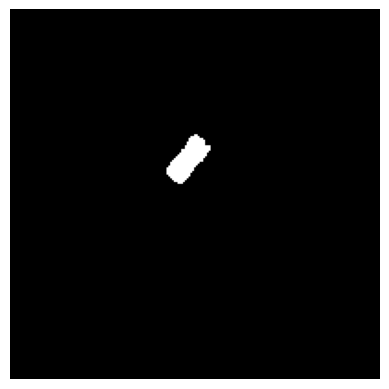

In [130]:
show_(ref_mask)

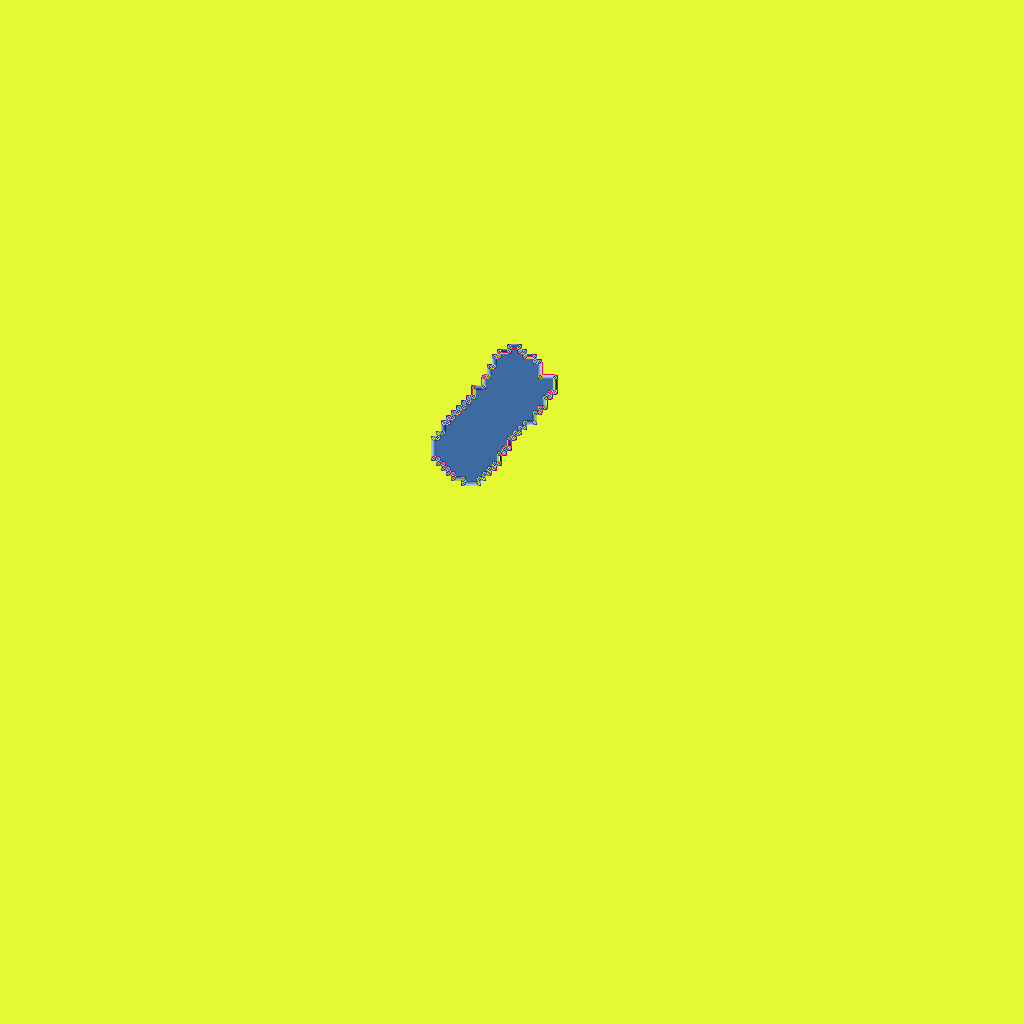

In [132]:
to_pil_image(prep_mask[0])

In [135]:
ref_feat.shape

torch.Size([64, 64, 256])

In [139]:
ref_mask_f = F.interpolate(prep_mask, size=ref_feat.shape[0:2], mode='bilinear')
ref_mask_f.shape

torch.Size([1, 3, 64, 64])

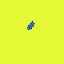

In [140]:
to_pil_image(ref_mask_f[0])

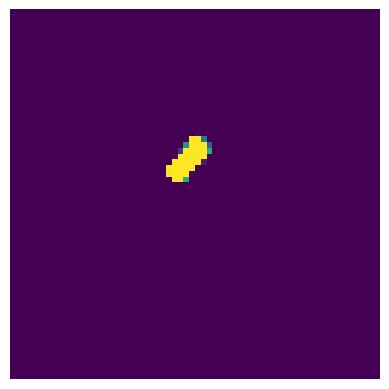

In [146]:
r_msk_ =  ref_mask_f.squeeze()[0]
show_(r_msk_)

In [147]:
ref_feat.shape, r_msk_.shape

(torch.Size([64, 64, 256]), torch.Size([64, 64]))

(None, torch.Size([33, 256]))

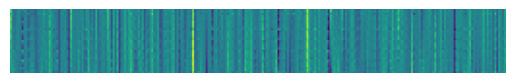

In [150]:
target_feat = ref_feat[r_msk_> 0]
show_(target_feat), target_feat.shape

In [153]:
target_feat.mean(0).shape


torch.Size([256])

In [154]:
target_embedding = target_feat.mean(0).unsqueeze(0)
target_embedding.shape

torch.Size([1, 256])

In [157]:
target_feat = target_embedding/target_embedding.norm(dim=-1, keepdim=True)

In [158]:
target_feat.shape

torch.Size([1, 256])

In [160]:
target_emb = target_embedding.unsqueeze(0)
target_emb.shape

torch.Size([1, 1, 256])

In [161]:
type(ref_feat)

torch.Tensor

In [167]:
#| export
def get_ref_mask(
    ref_mask:np.ndarray,
    ref_feat:torch.Tensor # ref feature from model
    ):
    ' get reference mask '

    ref_msk_ = prepare_mask(ref_mask)
    ref_msk_ = F.interpolate(ref_msk_, size=ref_feat.shape[0: 2], mode="bilinear")
    ref_msk_ = ref_msk_.squeeze()[0]
    return ref_msk_




In [165]:
ref_msk_ = get_ref_mask(
    ref_mask,
    ref_feat
)

In [166]:
ref_msk_.shape

torch.Size([64, 64])

In [202]:
#| export
def get_target_feat(
    ref_msk:torch.Tensor,
    ref_feat:torch.Tensor
    ):
    ' extract features from target'

    ref_msk_ = get_ref_mask(ref_msk, ref_feat=ref_feat)
    trgt_feat = ref_feat[ref_msk_ > 0]
    targt_emb = trgt_feat.mean(0).unsqueeze(0)
    ##########################################

    trgt_ft_ = target_emb / target_emb.norm(dim=-1, keepdim=True)
    print(f' trgt emb shape = {targt_emb.shape}')
    trgt_emb = targt_emb.unsqueeze(0)
    return trgt_ft_



In [213]:
def get_image_embeddings(
    img:Image,
    model:SamModel,
    processor:AutoProcessor,
    device='cpu'
    )->torch.Tensor:
    'get embedding of the img from model'

    inputs = processor(
                        images=img, 
                        return_tensors='pt',
                        ).to(device)
    pixel_values_ = inputs.pixel_values

    # image feature encoding
    with torch.no_grad():
        test_feat = model.get_image_embeddings(pixel_values_)
    return test_feat.squeeze()


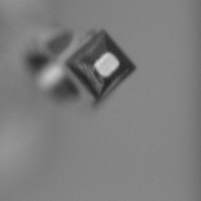

In [176]:
img

In [215]:
tst_feat = get_image_embeddings(
    img=img,
    model=model,
    processor=processor,
    device='cpu'
)

In [216]:
tst_feat.shape

torch.Size([256, 64, 64])

In [214]:
target_feat = get_target_feat(ref_mask, ref_feat)
target_feat.shape

 trgt emb shape = torch.Size([1, 256])


torch.Size([1, 1, 256])

In [206]:
#| export
def get_norm_(x:torch.Tensor):
    ' Calcualte norm of x'
    return  x / x.norm(dim=0, keepdim=True)

In [221]:
#| export
def get_cosine_sim(
    trgt_feat:torch.Tensor,
    tst_feat:torch.Tensor
    ):
    ' Calculate cosine similarity between tst and target image'

    c, h, w = tst_feat.shape
    tst_feat_norm = get_norm_(tst_feat)
    tst_feat_norm_r = tst_feat_norm.reshape(
        c, 
        h*w
    )
    sim = trgt_feat @ tst_feat_norm_r
    return sim.reshape(1, 1, h, w)


In [217]:
tst_feat.shape

torch.Size([256, 64, 64])

In [252]:
sim = get_cosine_sim(
                    trgt_feat=target_feat,
                    tst_feat=tst_feat
                    )

In [245]:
sim.shape

torch.Size([1, 1, 64, 64])

In [224]:
target_feat.shape



torch.Size([1, 1, 256])

In [253]:
sim = F.interpolate(sim, scale_factor=4, mode='bilinear')

In [254]:
sim.shape

torch.Size([1, 1, 256, 256])

In [227]:
4 * 64

256

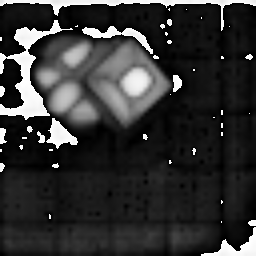

In [229]:
to_pil_image(sim[0])

In [234]:
def get_processed_img_dic(
    img:Image,
    processor:AutoProcessor,
    device:str,
   )->Dict:
   'Get processed dict of image'
   inputs = processor(
    images=img,
    return_tensors='pt'
   ).to(device)
   return inputs

In [236]:
inputs = get_processed_img_dic(img, processor, device='cpu')
sim = processor.post_process_masks(
    sim.unsqueeze(1), 
    original_sizes=inputs["original_sizes"].tolist(), 
    reshaped_input_sizes=inputs["reshaped_input_sizes"].tolist(),
                                   binarize=False)

In [239]:
len(sim)

1

In [241]:
sim[0].shape

torch.Size([1, 1, 201, 201])

In [246]:
def process_similarity(
    sim:torch.Tensor, # similarity between source embedding and target embeddings of model
    inputs:Dict, # proocessed image from AutoProcessor
    ):
    ' Convert similarity to actual image image'
    sim = processor.post_process_masks(
        sim.unsqueeze(1), 
        original_sizes=inputs["original_sizes"].tolist(), 
        reshaped_input_sizes=inputs["reshaped_input_sizes"].tolist(),
                                    binarize=False)
    return sim[0].squeeze()


In [247]:
sim.shape

torch.Size([1, 1, 64, 64])

In [265]:
sim_prc = process_similarity(sim, inputs
                    )

In [266]:
sim_prc.shape

torch.Size([201, 201])

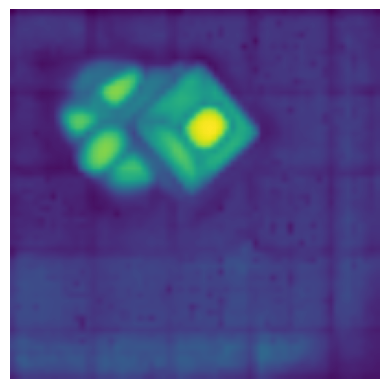

In [267]:
show_(sim_prc)

# 3. Location Prior

In [290]:
w, h = sim_prc.shape
top_x = sim_prc.flatten(0).topk(1)[1]

tensor([12972])

In [291]:
def point_selection(mask_sim, topk=1):
    # Top-1 point selection
    w, h = mask_sim.shape
    topk_xy = mask_sim.flatten(0).topk(topk)[1]
    topk_x = (topk_xy // h).unsqueeze(0)
    topk_y = (topk_xy - topk_x * h)
    topk_xy = torch.cat((topk_y, topk_x), dim=0).permute(1, 0)
    topk_label = np.array([1] * topk)
    topk_xy = topk_xy.cpu().numpy()
        
    # Top-last point selection
    last_xy = mask_sim.flatten(0).topk(topk, largest=False)[1]
    last_x = (last_xy // h).unsqueeze(0)
    last_y = (last_xy - last_x * h)
    last_xy = torch.cat((last_y, last_x), dim=0).permute(1, 0)
    last_label = np.array([0] * topk)
    last_xy = last_xy.cpu().numpy()
    
    return topk_xy, topk_label, last_xy, last_label

In [331]:
def get_pos_neg_loc_prior(
    mask_sim,  # mask similarity
    topk=1# how many components need to create
    ):
    'Get pos and negative prior location'
    topk_xy_i, topk_label_i, last_xy_i, last_label_i = point_selection(sim_prc, topk=1)
    topk_xy = np.concatenate([topk_xy_i, last_xy_i], axis=0)
    topk_label = np.concatenate([topk_label_i, last_label_i], axis=0)
    return topk_xy, topk_label



In [334]:
topk_xy, topk_label = get_pos_neg_loc_prior(sim_prc)

In [335]:
topk_xy, topk_label

(array([[108,  64],
        [ 45,   0]], dtype=int64),
 array([1, 0]))

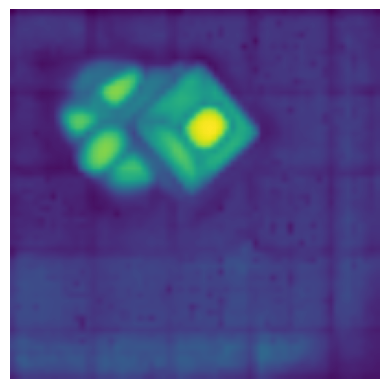

In [ ]:
show_(sim_prc)

In [336]:
sim_prc.mean(), sim_prc.std(), sim_prc.shape

(tensor(-0.0005), tensor(0.9893), torch.Size([201, 201]))

In [270]:

sim = sim_prc
# Obtain the target guidance for cross-attention layers
sim = (sim - sim.mean()) / torch.std(sim)
sim = F.interpolate(sim.unsqueeze(0).unsqueeze(0), size=(64, 64), mode="bilinear")
attention_similarity = sim.sigmoid_().unsqueeze(0).flatten(3)
print("Shape of attention_similarity:", attention_similarity.shape)
print("First values of attention_similarity:", attention_similarity[0,0,:3,:3])

Shape of attention_similarity: torch.Size([1, 1, 1, 4096])
First values of attention_similarity: tensor([[0.2043, 0.2718, 0.2704]])


In [271]:

# prepare test image and prompts for the model
inputs = processor(img, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], return_tensors="pt").to(device)
for k,v in inputs.items():
  print(k,v.shape)
     

pixel_values torch.Size([1, 3, 1024, 1024])
original_sizes torch.Size([1, 2])
reshaped_input_sizes torch.Size([1, 2])
input_points torch.Size([1, 1, 2, 2])
input_labels torch.Size([1, 1, 2])


In [273]:

# First-step prediction
with torch.no_grad():
  outputs = model(
      input_points=inputs.input_points, 
      input_labels=inputs.input_labels,
      image_embeddings=tst_feat.unsqueeze(0),
      multimask_output=False,
      attention_similarity=attention_similarity,  # Target-guided Attention
      target_embedding=target_embedding  # Target-semantic Prompting
  )
  best_idx = 0

In [275]:

# Cascaded Post-refinement-1
with torch.no_grad():
  outputs_1 = model(
              input_points=inputs.input_points, 
              input_labels=inputs.input_labels,
              input_masks=outputs.pred_masks.squeeze(1)[best_idx: best_idx + 1, :, :], 
              image_embeddings=tst_feat.unsqueeze(0),
              multimask_output=True)
     

In [278]:
masks = processor.image_processor.post_process_masks(outputs_1.pred_masks.cpu(),
                                                     inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()

best_idx = torch.argmax(outputs_1.iou_scores).item()
y, x = np.nonzero(masks[best_idx])
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
input_boxes = [[[x_min, y_min, x_max, y_max]]]

inputs = processor(img, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], input_boxes=input_boxes,
                   return_tensors="pt").to(device)

final_outputs = model(
    input_points=inputs.input_points, 
    input_labels=inputs.input_labels,
    input_boxes=inputs.input_boxes,
    input_masks=outputs_1.pred_masks.squeeze(1)[:,best_idx: best_idx + 1, :, :], 
    image_embeddings=tst_feat.unsqueeze(0),
    multimask_output=True)

In [280]:
masks = processor.image_processor.post_process_masks(final_outputs.pred_masks.cpu(),
                                                     inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 200.5, 200.5, -0.5)

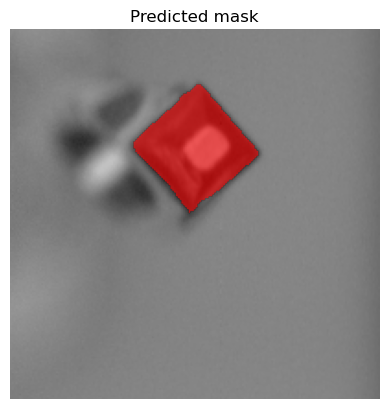

In [283]:

import matplotlib.pyplot as plt

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([255, 0, 0, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

fig, axes = plt.subplots()

best_idx = torch.argmax(final_outputs.iou_scores).item()
axes.imshow(np.array(img))
show_mask(masks[best_idx], axes)
axes.title.set_text(f"Predicted mask")
axes.axis("off")
     
